In this notebook, we simply reproduce the examples presented in the paper [_"Retrieval and analysis of Eurostat open data with the eurostat package"_](https://journal.r-project.org/archive/2017/RJ-2017-019/RJ-2017-019.pdf) by L. Lahti, P. Biecek, M. Kainu and J. Huovari (_R Journal_ 9(1):385-392, 2017). See also this online [tutorial](https://rdrr.io/cran/eurostat/f/inst/doc/eurostat_tutorial.pdf) on `eurostat` package. 

In [1]:
library("eurostat")
library("ggrepel")

Loading required package: ggplot2


### Finding data

In [2]:
toc <-get_eurostat_toc()
head(toc)

title,code,type,last update of data,last table structure change,data start,data end,values
Database by themes,data,folder,NA,NA,NA,NA,NA
General and regional statistics,general,folder,NA,NA,NA,NA,NA
European and national indicators for short-term analysis,euroind,folder,NA,NA,NA,NA,NA
Business and consumer surveys (source: DG ECFIN),ei_bcs,folder,NA,NA,NA,NA,NA
Consumer surveys (source: DG ECFIN),ei_bcs_cs,folder,NA,NA,NA,NA,NA
Consumers - monthly data,ei_bsco_m,dataset,30.08.2018,30.08.2018,1980M01,2018M08,NA


In [3]:
head(search_eurostat("passenger transport"))

title,code,type,last update of data,last table structure change,data start,data end,values
Volume of passenger transport relative to GDP,tran_hv_pstra,dataset,30.07.2018,30.07.2018,2000,2016,NA
Modal split of passenger transport,tran_hv_psmod,dataset,27.08.2018,27.08.2018,1990,2016,NA
"Railway transport - total annual passenger transport (1 000 pass., million pkm)",rail_pa_total,dataset,07.08.2018,24.07.2018,2004,2016,NA
Railway transport - passenger transport by type of transport (detailed reporting only) (1 000 pass.),rail_pa_typepas,dataset,17.07.2018,31.08.2017,2004,2016,NA
Railway transport - passenger transport by type of transport (detailed reporting only) (million pkm),rail_pa_typepkm,dataset,17.07.2018,31.08.2017,2004,2016,NA
International railway passenger transport from the reporting country to the country of disembarkation (1 000 passengers),rail_pa_intgong,dataset,16.08.2018,17.07.2018,2004,2017,NA


### Downloading data

In [4]:
id <-search_eurostat("Modal split of passenger transport", type ="table")$code[1]
print(id)

[1] "t2020_rk310"


In [5]:
dat <-get_eurostat(id, time_format = "num")
str(dat)
head(dat)

Table t2020_rk310 cached at /tmp/Rtmpd8btqK/eurostat/t2020_rk310_num_code_TF.rds


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	2536 obs. of  5 variables:
 $ unit   : Factor w/ 1 level "PC": 1 1 1 1 1 1 1 1 1 1 ...
 $ vehicle: Factor w/ 3 levels "BUS_TOT","CAR",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ geo    : Factor w/ 35 levels "AT","BE","CH",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ time   : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ values : num  11 10.6 3.7 9.1 11.3 32.4 14.9 13.5 6 24.8 ...


unit,vehicle,geo,time,values
PC,BUS_TOT,AT,1990,11.0
PC,BUS_TOT,BE,1990,10.6
PC,BUS_TOT,CH,1990,3.7
PC,BUS_TOT,DE,1990,9.1
PC,BUS_TOT,DK,1990,11.3
PC,BUS_TOT,EL,1990,32.4


In [6]:
dat2 <- get_eurostat(id, filters = list(geo = c("EU28", "FI"), lastTimePeriod=1), time_format = "num")
head(dat2)

unit,vehicle,geo,time,values
PC,BUS_TOT,EU28,2016,9.4
PC,BUS_TOT,FI,2016,11.9
PC,CAR,EU28,2016,82.9
PC,CAR,FI,2016,82.5
PC,TRN,EU28,2016,7.7
PC,TRN,FI,2016,5.6


In [7]:
datl2 <- get_eurostat(id, filters = list(geo = c("EU28", "FI"),lastTimePeriod = 1), type = "label", time_format = "num")
head(datl2)

unit,vehicle,geo,time,values
Percentage,"Motor coaches, buses and trolley buses",European Union (current composition),2016,9.4
Percentage,"Motor coaches, buses and trolley buses",Finland,2016,11.9
Percentage,Passenger cars,European Union (current composition),2016,82.9
Percentage,Passenger cars,Finland,2016,82.5
Percentage,Trains,European Union (current composition),2016,7.7
Percentage,Trains,Finland,2016,5.6


In [8]:
datl <- label_eurostat(dat)
head(datl)

unit,vehicle,geo,time,values
Percentage,"Motor coaches, buses and trolley buses",Austria,1990,11.0
Percentage,"Motor coaches, buses and trolley buses",Belgium,1990,10.6
Percentage,"Motor coaches, buses and trolley buses",Switzerland,1990,3.7
Percentage,"Motor coaches, buses and trolley buses",Germany (until 1990 former territory of the FRG),1990,9.1
Percentage,"Motor coaches, buses and trolley buses",Denmark,1990,11.3
Percentage,"Motor coaches, buses and trolley buses",Greece,1990,32.4


In [9]:
label_eurostat_vars(names(datl))
levels(datl$vehicle)

[1] "Unit of measure"                                                                     
[2] "Vehicles"                                                                            
[3] "Geopolitical entity (reporting)"                                                     
[4] "Period of time (a=annual, q=quarterly, m=monthly, d=daily, c=cumulated from January)"

[1] "Motor coaches, buses and trolley buses"
[2] "Passenger cars"                        
[3] "Trains"

### Selecting and modifying data

**EFTA, Eurozone, EU and EU candidate countries**

In [10]:
data(efta_countries)
efta_countries

code,name
IS,Iceland
LI,Liechtenstein
NO,Norway
CH,Switzerland


**EU data from 2012 in all vehicles**

In [11]:
dat_eu12 <-subset(datl, geo=="European Union (current composition)" & time==2012)
dat_eu12

unit,vehicle,geo,time,values
Percentage,"Motor coaches, buses and trolley buses",European Union (current composition),2012,9.5
Percentage,Passenger cars,European Union (current composition),2012,82.9
Percentage,Trains,European Union (current composition),2012,7.7


**EU data from 2000 - 2012 with vehicle types as variables**

In [12]:
library("tidyr")
dat_eu_0012 <- subset(dat, geo == "EU28" & time %in% 2000:2012)
dat_eu_0012_wide <- spread(dat_eu_0012, vehicle, values)
subset(dat_eu_0012_wide, select = -geo)

unit,time,BUS_TOT,CAR,TRN
PC,2000,10.4,82.4,7.2
PC,2001,10.2,82.7,7.1
PC,2002,9.9,83.3,6.8
PC,2003,9.9,83.5,6.7
PC,2004,9.8,83.4,6.8
PC,2005,9.8,83.3,6.9
PC,2006,9.7,83.2,7.1
PC,2007,9.8,83.1,7.1
PC,2008,9.9,82.8,7.4
PC,2009,9.3,83.6,7.1


**Train passengers for selected EU countries in 2000 - 2012**

In [13]:
dat_trains <- subset(datl, geo %in% c("Austria", "Belgium", "Finland", "Sweden") & time %in% 2000:2012 & vehicle == "Trains")
dat_trains_wide <- spread(dat_trains, geo, values)
subset (dat_trains_wide, select = - vehicle)

unit,time,Austria,Belgium,Finland,Sweden
Percentage,2000,9.7,6.3,5.1,6.8
Percentage,2001,9.7,6.4,4.8,7.1
Percentage,2002,9.7,6.5,4.8,7.1
Percentage,2003,9.5,6.5,4.7,7.0
Percentage,2004,9.4,7.1,4.7,6.8
Percentage,2005,9.8,6.6,4.8,7.1
Percentage,2006,10.0,6.9,4.8,7.6
Percentage,2007,10.0,7.1,5.0,7.9
Percentage,2008,11.1,7.5,5.4,8.6
Percentage,2009,11.1,7.5,5.1,8.7


**Visualization**

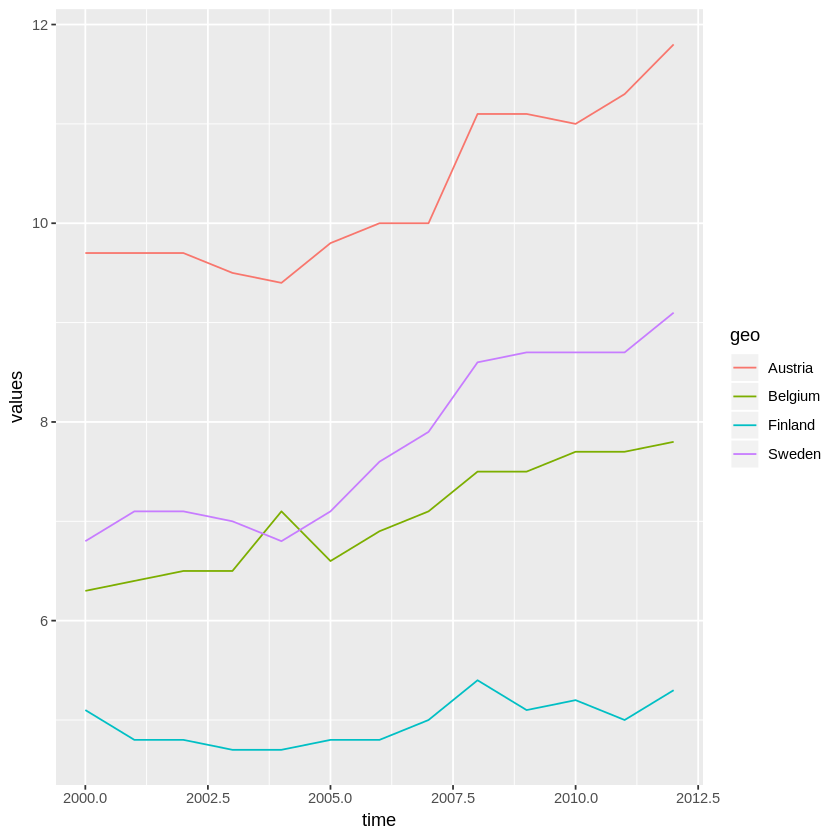

In [14]:
library(ggplot2)
p <- ggplot (dat_trains, aes( x = time, y = values, colour = geo))
p <- p + geom_line()
print(p)

Table ten00081 cached at /tmp/Rtmpd8btqK/eurostat/ten00081_date_code_TF.rds


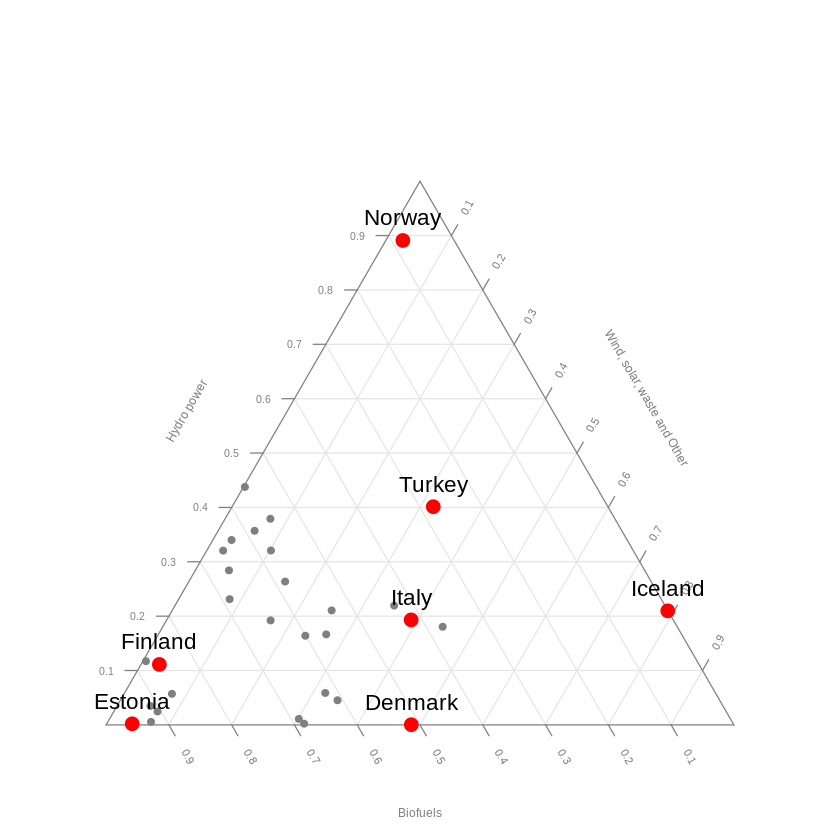

In [21]:
library(tidyr)
library(plotrix)
library(dplyr)

# All sources of renewable energy are to be grouped into three sets
dict <- c("Solid biofuels (excluding charcoal)"="Biofuels","Biogasoline"="Biofuels","Other liquid biofuels"="Biofuels",
"Biodiesels"="Biofuels","Biogas"="Biofuels","Hydro power"="Hydro power","Tide, Wave and Ocean"="Hydro power",
"Solar thermal"="Wind, solar, waste and Other","Geothermal Energy"="Wind, solar, waste and Other",
"Solar photovoltaic"="Wind, solar, waste and Other","Municipal waste (renewable)"="Wind, solar, waste and Other",
"Wind power"="Wind, solar, waste and Other","Bio jet kerosene"="Wind, solar, waste and Other")
# Some cleaning of the data is required
energy3 <- get_eurostat("ten00081")%>%
label_eurostat(dat)%>%
filter(time=="2013-01-01",product!="Renewable energies")%>%
mutate(nproduct =dict[as.character(product)],# just three categories
geo =gsub(geo,pattern=" \\(.*",replacement=""))%>%
select(nproduct, geo, values)%>%
group_by(nproduct, geo)%>%
summarise(svalue =sum(values))%>%
group_by(geo)%>%
mutate(tvalue =sum(svalue),svalue =svalue/sum(svalue))%>%
filter(tvalue>1000)%>%
# only large countries
spread(nproduct, svalue)# Triangle plot
par(cex=0.75,mar=c(0,0,0,0))
positions <- plotrix::triax.plot(as.matrix(energy3[,c(3,5,4)]),
                show.grid =TRUE,
                label.points=FALSE,
                point.labels =energy3$geo,
                col.axis="gray50",col.grid="gray90",
                pch =19,cex.axis=0.8,cex.ticks=0.7,col="grey50")
# Larger labels
ind <-which(energy3$geo %in% c("Norway","Iceland","Denmark","Estonia","Turkey","Italy","Finland"))
df <-data.frame(positions$xypos,geo =energy3$geo)
points(df$x[ind], df$y[ind],cex=2,col="red",pch=19)
text(df$x[ind], df$y[ind], df$geo[ind],adj =c(0.5,-1),cex=1.5)

In [22]:
library(sf)
library(tmap)

Linking to GEOS 3.6.2, GDAL 2.2.3, proj.4 4.9.3


ERROR: Error in library(tmap): there is no package called ‘tmap’


In [ ]:
query <- search_eurostat("road accidents", type = "table")

In [17]:
query$code[[1]]
query$title[[1]]

[1] "sdg_11_40"

[1] "People killed in road accidents (source: DG MOVE)"

Note that the table `tsdtr420` mentioned in the original paper has been discontinued (see for instance this [archive](https://ec.europa.eu/eurostat/statistics-explained/index.php?oldid=54178)), it has been replaced with a dedicated [EU SDG](https://ec.europa.eu/eurostat/statistics-explained/index.php/SDG_11_-_Sustainable_cities_and_communities_(statistical_annex)) indicator, namely `sdg_11_40` ([this table](https://ec.europa.eu/eurostat/web/products-datasets/-/sdg_11_40)).

In [18]:
dat <- get_eurostat(id = "sdg_11_40", time_format = "num")
head(dat)

Table sdg_11_40 cached at /tmp/Rtmpd8btqK/eurostat/sdg_11_40_num_code_TF.rds


unit,geo,time,values
NR,AT,2001,958
NR,BE,2001,1486
NR,BG,2001,1011
NR,CY,2001,98
NR,CZ,2001,1333
NR,DE,2001,6977


We can still run similar operations:

In [19]:
countries <- c("UK", "SK", "FR", "PL", "ES", "PT")
t1 <- get_eurostat("sdg_11_40", filters = list(geo = countries))

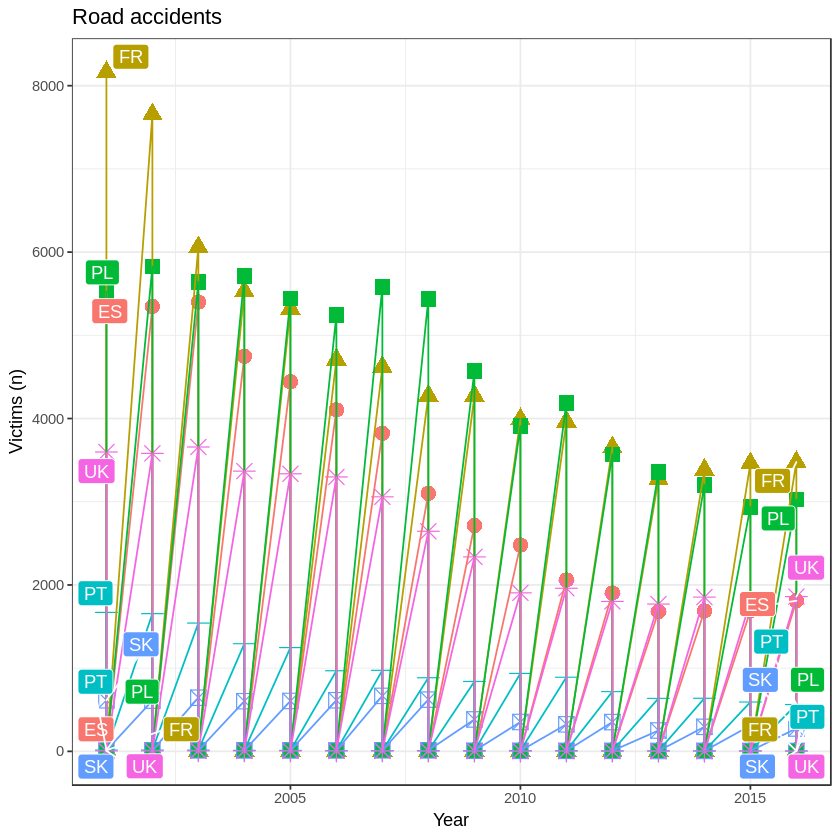

In [20]:
library("ggplot2")
library("ggrepel")
ggplot(t1, aes(x = time, y = values, color = geo, group = geo, shape = geo)) +
    geom_point(size = 4) + geom_line() + theme_bw() +
    ggtitle("Road accidents") + xlab("Year") + ylab("Victims (n)") +
    theme(legend.position = "none") +
    ggrepel::geom_label_repel(data = t1 %>% group_by(geo) %>% na.omit() %>%
    filter(time %in% c(min(time), max(time))), aes(fill = geo, label = geo), color = "white")